In [3]:
# much of this code is copied from examples provided by Robert Haase https://github.com/haesleinhuepf

from skimage.io import imread, imshow
import matplotlib.pyplot as plt

input_image = imread("D://images//tutorial set//IXMtest_A02_s9.tif")
                                             
# define an interesting sub-region
bb_x=200
bb_y=0
bb_width=200
bb_height=200

In [5]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

<GeForce RTX 3090 on Platform: NVIDIA CUDA (1 refs)>

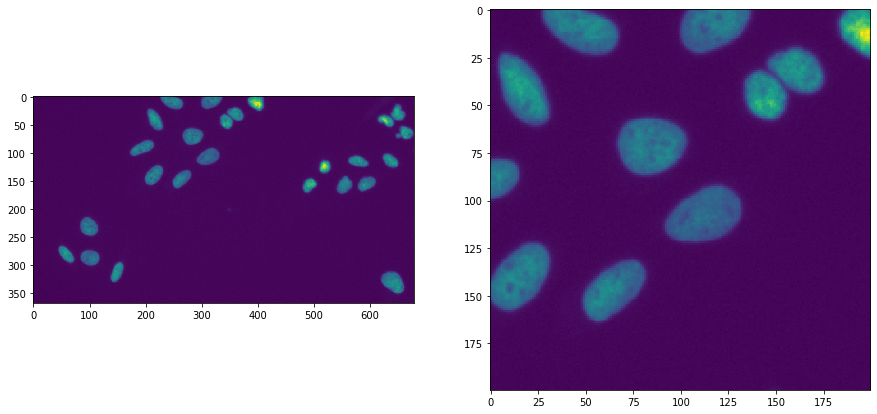

In [6]:
input_gpu = cle.push(input_image)

input_crop = cle.crop(input_gpu, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(input_gpu, plot=axs[0])
cle.imshow(input_crop, plot=axs[1])

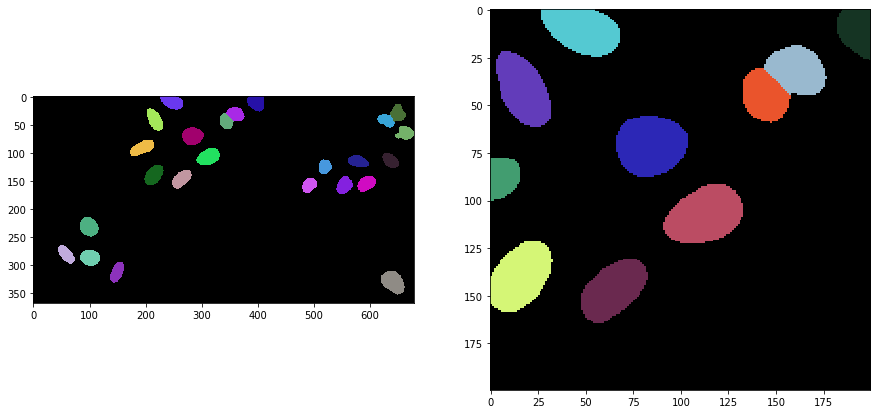

In [10]:
sigma_spot_detection = 5
sigma_outline = 1

segmented = cle.voronoi_otsu_labeling(input_gpu, spot_sigma=sigma_spot_detection, outline_sigma=sigma_outline)
segmented_crop = cle.crop(segmented, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

In [11]:
image_to_segment = input_crop
print(image_to_segment.shape)

(200, 200)


number of detected spots 28.0


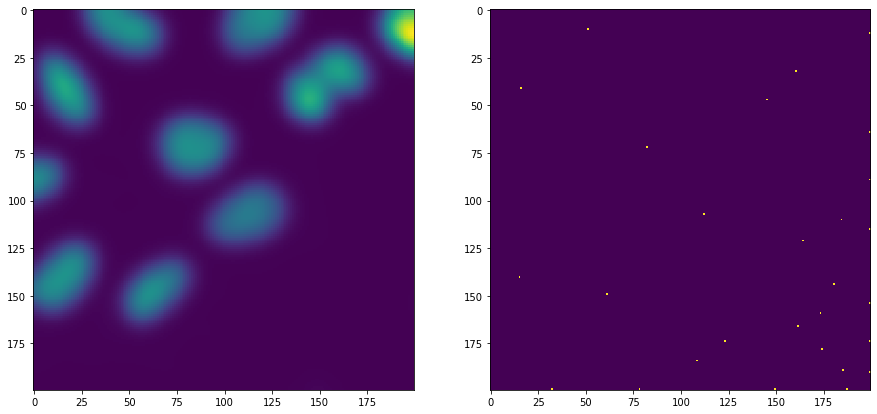

In [12]:
blurred = cle.gaussian_blur(image_to_segment, sigma_x=sigma_spot_detection, sigma_y=sigma_spot_detection, sigma_z=sigma_spot_detection)

detected_spots = cle.detect_maxima_box(blurred, radius_x=0, radius_y=0, radius_z=0)

number_of_spots = cle.sum_of_all_pixels(detected_spots)
print("number of detected spots", number_of_spots)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(blurred, plot=axs[0])
cle.imshow(detected_spots, plot=axs[1])

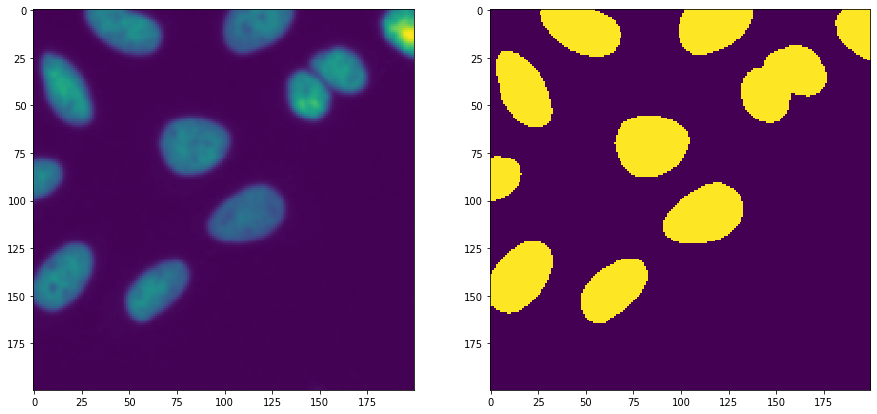

In [13]:
blurred = cle.gaussian_blur(image_to_segment, sigma_x=sigma_outline, sigma_y=sigma_outline, sigma_z=sigma_outline)

binary = cle.threshold_otsu(blurred)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(blurred, plot=axs[0])
cle.imshow(binary, plot=axs[1])

number of selected spots 9.0


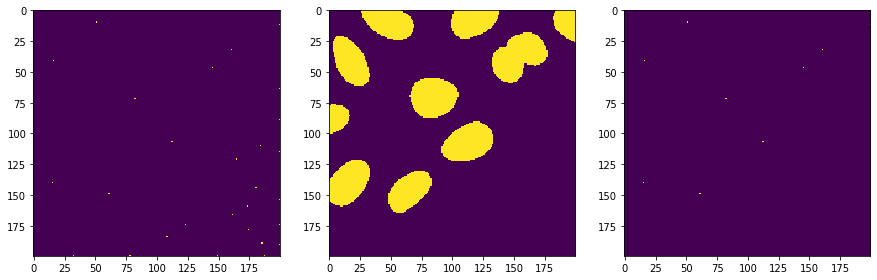

In [14]:
selected_spots = cle.binary_and(binary, detected_spots)

number_of_spots = cle.sum_of_all_pixels(selected_spots)
print("number of selected spots", number_of_spots)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(detected_spots, plot=axs[0])
cle.imshow(binary, plot=axs[1])
cle.imshow(selected_spots, plot=axs[2])

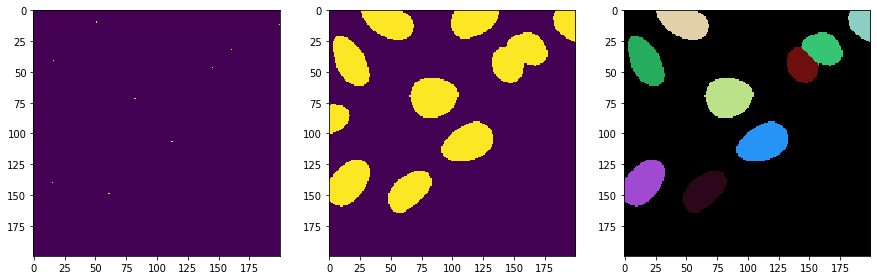

In [15]:
voronoi_diagram = cle.masked_voronoi_labeling(selected_spots, binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
cle.imshow(selected_spots, plot=axs[0])
cle.imshow(binary, plot=axs[1])
cle.imshow(voronoi_diagram, labels=True, plot=axs[2])